# **Import necessary libraries and load the dataset.**

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [162]:
df=pd.read_csv('Breast_cancer.csv')

# **Preprocess and analyze the dataset.**

In [163]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [164]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [165]:
df.shape

(569, 33)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [167]:
# Convert 'diagnosis' to binary: M=1, B=0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Drop ID column & unnamed column
df.drop(columns=[col for col in df.columns if 'Unnamed' in col or col == 'id'], inplace=True)

In [168]:
# Check shape to validate
df.shape

(569, 31)

In [169]:
# Check for duplicated data
df.duplicated().sum()

np.int64(0)

# **Split data into train and test set.**

In [190]:
# Split features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Use SVM and RBF for training.**

In [191]:
# Linear kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred_linear))


0.9766081871345029


In [192]:
# RBF kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred_rbf))

0.9766081871345029


# **Evaluate SVM and RBF.**


SVM Linear Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



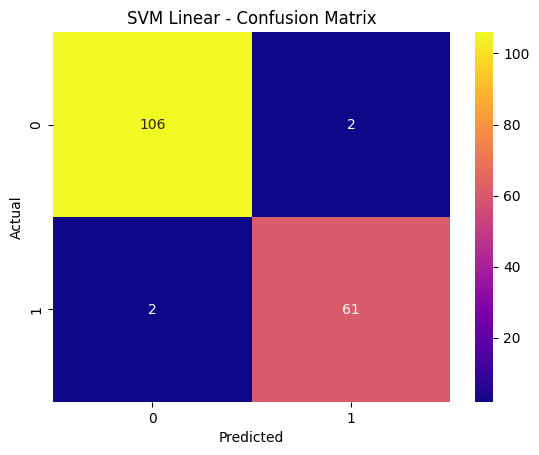


SVM RBF Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



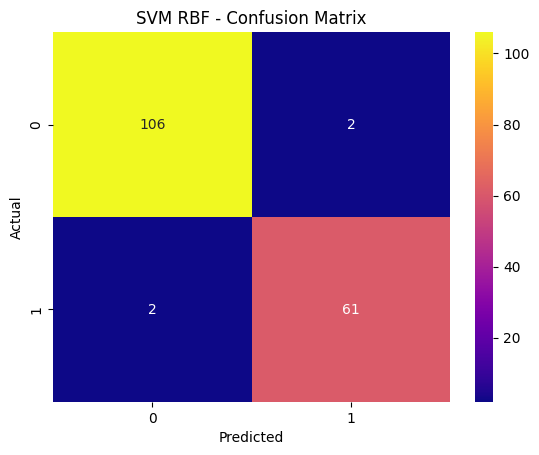

In [180]:
def evaluate(name, y_true, y_pred):
    print(f"\n{name} Classification Report:\n", classification_report(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='plasma')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate("SVM Linear", y_test, y_pred_linear)
evaluate("SVM RBF", y_test, y_pred_rbf)


# **Dimensionality Reduction and Visualization.**

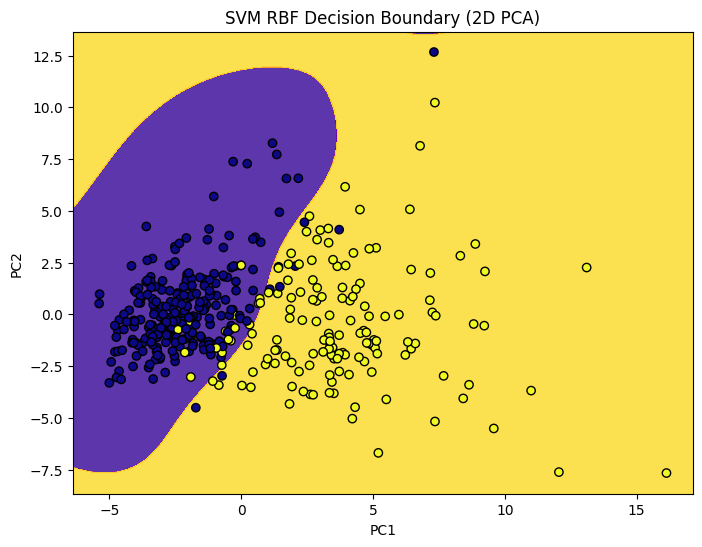

In [173]:
# PCA for 2D reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Retrain model on PCA data
svm_vis = SVC(kernel='rbf', C=1, gamma='scale')
svm_vis.fit(X_pca, y_train)

def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.plasma, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.plasma, edgecolors='k')
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

plot_decision_boundary(svm_vis, X_pca, y_train, "SVM RBF Decision Boundary (2D PCA)")


# **Hyperparameter Tuning with GridSearchCV.**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

Tuned SVM RBF Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       108
           1       0.91      0.97      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171



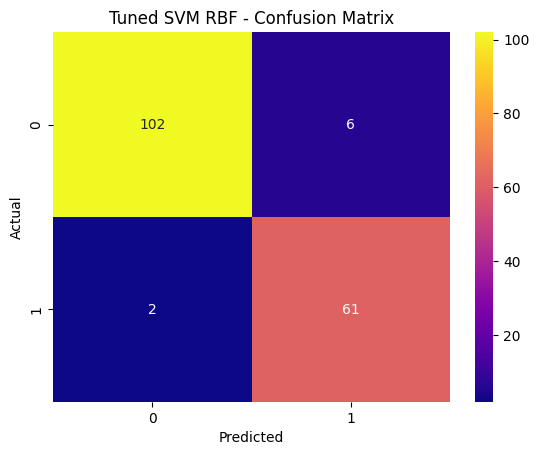

In [174]:
# Find best hyperparameter values using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)

# Predict using best model
y_pred_best = grid.best_estimator_.predict(X_test_scaled)
evaluate("Tuned SVM RBF", y_test, y_pred_best)


# **Evaluation of the tuned SVM model.**

In [186]:
# Evaluate the performance of the tuned SVM model
scores = cross_val_score(grid.best_estimator_, X, y, cv=5)
print("Accuracy score of the tuned SVM:",accuracy_score(y_test, y_pred_best))
print("Cross-validation scores:", scores)
print("Mean CV Accuracy:", scores.mean())


Accuracy score of the tuned SVM: 0.9532163742690059
Cross-validation scores: [0.89473684 0.93859649 0.92982456 0.94736842 0.94690265]
Mean CV Accuracy: 0.9314857941313461


# **Retrain the model using important features and dropping the rest.**

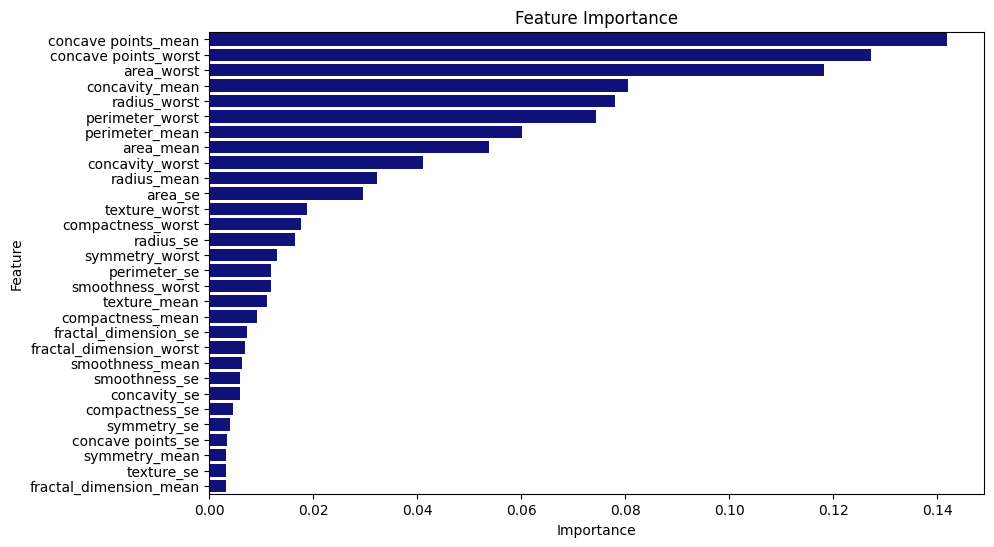

,Feature,Importance
7,concave points_mean,0.141934
27,concave points_worst,0.127136
23,area_worst,0.118217
6,concavity_mean,0.080557
20,radius_worst,0.077975
22,perimeter_worst,0.074292
2,perimeter_mean,0.060092
3,area_mean,0.053810
26,concavity_worst,0.041080
0,radius_mean,0.032312


In [176]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='darkblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print the significant features in a table
feature_importance_df



Retrained SVM (Reduced Features) Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



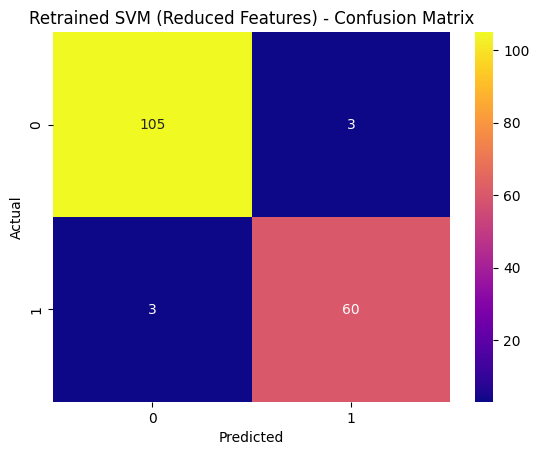

In [193]:
# Set a threshold for feature importance
importance_threshold = 0.07 # Play around with different values, adjust as needed

# Get the names of features above the threshold
important_features = feature_importance_df[feature_importance_df['Importance'] > importance_threshold]['Feature'].tolist()

# Filter the dataset to include only important features
X_important = X[important_features]

# Split data again with important features
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_important, y, test_size=0.3, random_state=42)

# Scale the data again
scaler_imp = StandardScaler()
X_train_scaled_imp = scaler_imp.fit_transform(X_train_imp)
X_test_scaled_imp = scaler_imp.transform(X_test_imp)

# Retrain the SVM model with best parameters from GridSearchCV on the reduced feature set
best_params = grid.best_params_ # use best parameters from previous grid search
svm_retrained = SVC(**best_params)
svm_retrained.fit(X_train_scaled_imp, y_train_imp)

# Predict using retrained model
y_pred_retrained = svm_retrained.predict(X_test_scaled_imp)

# Evaluate the retrained model
evaluate("Retrained SVM (Reduced Features)", y_test_imp, y_pred_retrained)


# **Compare the accuracy of the models.**

SVM Linear (Before): 0.9766081871345029
SVM RBF (Before): 0.9766081871345029
Tuned SVM RBF (After Tuning): 0.9532163742690059
Retrained SVM (After Retraining): 0.9649122807017544


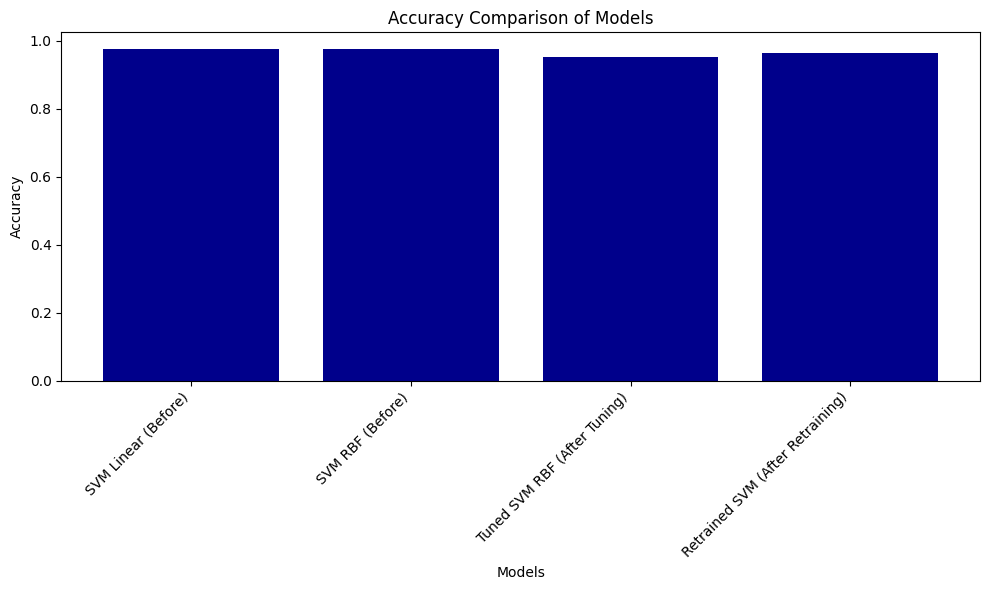

In [194]:
# Store accuracy scores
accuracy_scores = {}

accuracy_scores['SVM Linear (Before)'] = accuracy_score(y_test, y_pred_linear)
accuracy_scores['SVM RBF (Before)'] = accuracy_score(y_test, y_pred_rbf)
accuracy_scores['Tuned SVM RBF (After Tuning)'] = accuracy_score(y_test, y_pred_best)
accuracy_scores['Retrained SVM (After Retraining)'] = accuracy_score(y_test_imp, y_pred_retrained)

for model_name, accuracy in accuracy_scores.items():
    print(f"{model_name}: {accuracy}")

plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color="darkblue")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Models")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
